University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from tueplots import bundles
from tueplots.constants.color import rgb

cwd = os.getcwd()
REPO_ROOT = os.path.realpath(os.path.join(cwd, os.pardir))
sys.path.insert(1, os.path.join(REPO_ROOT, 'src'))
from plotting_functions import read_data, get_mean_delays

## Import data

In [3]:
df_dict = read_data('../dat/gain-comparison/avg_gain')

df_mean_delays = get_mean_delays(df_dict)['avg_gain']
switch_times_array = list(range(1,61,1))
df_mean_delays["switch_times"] = switch_times_array

Potsdam Hbf
Dortmund Hbf
Duesseldorf Hbf
Koeln Hbf
Nuernberg Hbf
Berlin Hbf
Essen Hbf
Karlsruhe Hbf
Schwerin Hbf
Hamburg Hbf
Erfurt Hbf
Magdeburg Hbf
Wiesbaden Hbf
Bremen Hbf
Muenchen Hbf
Hannover Hbf
Stuttgart Hbf
Saarbruecken Hbf
Kiel Hbf
Mainz Hbf
Leipzig Hbf
Duisburg Hbf
Dresden Hbf


## Mean Delay for each switch time 

### Plot

12


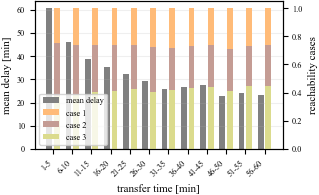

In [6]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
#plt.rcdefaults()
plt.rcParams['font.serif'] = 'Times New Roman'  # Or another available font
plt.rcParams['font.family'] = 'serif'
# Generate grouped Data

group_size = 5  # set group size 

grouped_mean_delays = []
#grouped_median_delays = []
grouped_reachable1 = []
grouped_reachable2 = []
grouped_reachable3 = []

for i in range(0, len(df_mean_delays.switch_times), group_size):
    group_sum_mean_delays = np.sum(df_mean_delays.mean_delay[i:i+group_size])
    grouped_mean_delays.append(group_sum_mean_delays)

    #group_sum_median_delays = np.sum(df_mean_delays.median_delay[i:i+group_size])
    #grouped_median_delays.append(group_sum_mean_delays)

    group_sum_reachable1 = np.sum(df_mean_delays.reachable1[i:i+group_size])
    grouped_reachable1.append(group_sum_reachable1)

    group_sum_reachable2 = np.sum(df_mean_delays.reachable2[i:i+group_size])
    grouped_reachable2.append(group_sum_reachable2)

    group_sum_reachable3 = np.sum(df_mean_delays.reachable3[i:i+group_size])
    grouped_reachable3.append(group_sum_reachable3)



print(len(grouped_mean_delays))
x = np.arange(len(grouped_mean_delays))

y_ticks_array = np.arange(0, max(grouped_mean_delays)/group_size+1, 10)



# FIGURE ------------------------------

fig, ax1 = plt.subplots()

width = 0.3
ax1.bar(x+1-0.2, np.array(grouped_mean_delays)/group_size, width, color="grey", label="mean delay")
#ax1.bar(x+1-0.2, np.array(grouped_median_delays)/group_size, width, color='black', alpha=0.2, label="median delay")

ax1.set_xlabel('transfer time [min]')
ax1.set_ylabel('mean delay [min]')
#xticks_array =  [f'{start}\n-\n{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
#ax1.set_xticks(x+1, xticks_array)
ax1.set_yticks(y_ticks_array)
ax1.yaxis.grid("major", alpha=0.2)
xticks_array =  [f'{start}-{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
ax1.set_xticks(x + 1)
ax1.set_xticklabels(xticks_array, rotation=45, ha='right')  # Rotate labels and set horizontal alignment

# ... [rest of your code] ...

#plt.show()



ax2 = ax1.twinx()

bottom = np.zeros(len(grouped_mean_delays))

reachables_total = np.array(grouped_reachable1) + np.array(grouped_reachable2) + np.array(grouped_reachable3)
bar1 = np.array(grouped_reachable1)/reachables_total
bar2 = np.array(grouped_reachable2)/reachables_total
bar3 = np.array(grouped_reachable3)/reachables_total

ax2.bar(x+1+0.2, bar1, width, color="#FFBB78", label="case 1", bottom=bottom+bar2+bar3)
ax2.bar(x+1+0.2, bar2, width, color="#C49C94", label="case 2", bottom=bottom+bar3)
ax2.bar(x+1+0.2, bar3, width, color="#DBDB8D", label="case 3", bottom=bottom)

#ax2.set_yscale()
ax2.set_ylabel('reachability cases')


# Solution for having two legends
bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(bars1 + bars2, labels1 + labels2, loc="lower left")

plt.savefig("plot_meanDelay_reachability_switchTime.pdf", format="pdf")

plt.show()